<a href="https://colab.research.google.com/github/sofiamirandagp/TELCOMX/blob/main/TELECOMZ_SMGP_CD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **📌 Extracción(E - Extract)**



**Cargar datos**




In [1]:
import pandas as pd
import numpy as np

In [2]:
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
datos = pd.read_json(url)
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


# **🔧 Transformación (T - Transform)**

In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [4]:
# Paso 1: Normalizar columnas anidadas
customer_df = pd.json_normalize(datos['customer'])
phone_df = pd.json_normalize(datos['phone'])
internet_df = pd.json_normalize(datos['internet'])
account_df = pd.json_normalize(datos['account'])

# Paso 2: Eliminar las columnas anidadas originales del DataFrame
datos.drop(columns=['customer', 'phone', 'internet', 'account'], inplace=True)

# Paso 3: Concatenar el DataFrame original con los nuevos datos normalizados
datos = pd.concat([datos, customer_df, phone_df, internet_df, account_df], axis=1)

# Paso 4: Verificar los cambios
datos.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [5]:
datos.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [6]:
datos.rename(columns={
    'customerID': 'ID_cliente',
    'Churn': 'cancelacion',
    'gender': 'genero',
    'SeniorCitizen': 'es_adulto_mayor',
    'Partner': 'tiene_pareja',
    'Dependents': 'tiene_dependientes',
    'tenure': 'meses_contrato',
    'PhoneService': 'servicio_telefonico',
    'MultipleLines': 'lineas_multiples',
    'InternetService': 'tipo_internet',
    'OnlineSecurity': 'seguridad_en_linea',
    'OnlineBackup': 'respaldo_en_linea',
    'DeviceProtection': 'proteccion_dispositivos',
    'TechSupport': 'soporte_tecnico',
    'StreamingTV': 'servicio_tv',
    'StreamingMovies': 'servicio_peliculas',
    'Contract': 'tipo_contrato',
    'PaperlessBilling': 'factura_electronica',
    'PaymentMethod': 'metodo_pago',
    'Charges.Monthly': 'cargo_mensual',
    'Charges.Total': 'cargo_total'
}, inplace=True)

In [7]:
datos.head()

,ID_cliente,cancelacion,genero,es_adulto_mayor,tiene_pareja,tiene_dependientes,meses_contrato,servicio_telefonico,lineas_multiples,tipo_internet,...,respaldo_en_linea,proteccion_dispositivos,soporte_tecnico,servicio_tv,servicio_peliculas,tipo_contrato,factura_electronica,metodo_pago,cargo_mensual,cargo_total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [8]:
datos_original = datos.copy()

**Limpieza de datos**

In [9]:
# 1. Cantidad de valores faltantes por columna
print(datos.isnull().sum())


ID_cliente                 0
cancelacion                0
genero                     0
es_adulto_mayor            0
tiene_pareja               0
tiene_dependientes         0
meses_contrato             0
servicio_telefonico        0
lineas_multiples           0
tipo_internet              0
seguridad_en_linea         0
respaldo_en_linea          0
proteccion_dispositivos    0
soporte_tecnico            0
servicio_tv                0
servicio_peliculas         0
tipo_contrato              0
factura_electronica        0
metodo_pago                0
cargo_mensual              0
cargo_total                0
dtype: int64


In [10]:
# 2. Detectar strings vacíos o espacios en columnas específicas
print("Strings vacíos en 'cancelo':", (datos['cancelacion'] == '').sum())
print("Strings con espacios en 'cancelo':", (datos['cancelacion'] == ' ').sum())

print("Strings vacíos en 'gastos_totales':", (datos['cargo_total'] == '').sum())
print("Strings con espacios en 'gastos_totales':", (datos['cargo_total'] == ' ').sum())

Strings vacíos en 'cancelo': 224
Strings con espacios en 'cancelo': 0
Strings vacíos en 'gastos_totales': 0
Strings con espacios en 'gastos_totales': 11


In [11]:
# 3. Reemplazar strings vacíos o espacios por np.nan
datos['cancelacion'] = datos['cancelacion'].replace(['', ' '], np.nan)
datos['cargo_total'] = datos['cargo_total'].replace(['', ' '], np.nan)

In [12]:
# 4. Revisar valores ausentes después del reemplazo
print("Valores ausentes después de reemplazar strings vacíos:")
print(datos.isnull().sum())

Valores ausentes después de reemplazar strings vacíos:
ID_cliente                   0
cancelacion                224
genero                       0
es_adulto_mayor              0
tiene_pareja                 0
tiene_dependientes           0
meses_contrato               0
servicio_telefonico          0
lineas_multiples             0
tipo_internet                0
seguridad_en_linea           0
respaldo_en_linea            0
proteccion_dispositivos      0
soporte_tecnico              0
servicio_tv                  0
servicio_peliculas           0
tipo_contrato                0
factura_electronica          0
metodo_pago                  0
cargo_mensual                0
cargo_total                 11
dtype: int64


In [13]:
# 5. Eliminar filas con NaN en 'cargo_total' (espacios convertidos a NaN)
datos = datos.dropna(subset=['cargo_total'])

In [14]:
# 6. Convertir 'cargo_total' a float
datos['cargo_total'] = datos['cargo_total'].astype(float)

<ipython-input-14-65866a4e456b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['cargo_total'] = datos['cargo_total'].astype(float)


In [15]:
# 7. Convertir columnas con valores 'Yes'/'No' a booleanos True/False
columnas_bool = ['cancelacion', 'es_adulto_mayor', 'tiene_pareja', 'tiene_dependientes', 'factura_electronica']
datos[columnas_bool] = datos[columnas_bool].replace({'Yes': True, 'No': False})

<ipython-input-15-f14f9b1a6057>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos[columnas_bool] = datos[columnas_bool].replace({'Yes': True, 'No': False})


In [16]:
datos['es_adulto_mayor'] = datos['es_adulto_mayor'].astype(bool)


In [17]:
# 8. Convertir columnas categóricas a tipo 'category' para mejor manejo
columnas_categoricas = ['lineas_multiples', 'seguridad_en_linea', 'respaldo_en_linea', 'proteccion_dispositivos',
                       'soporte_tecnico', 'servicio_tv', 'servicio_peliculas', 'tipo_internet', 'tipo_contrato', 'metodo_pago']
datos[columnas_categoricas] = datos[columnas_categoricas].astype('category')

In [18]:
# 9. Revisar que ya no haya duplicados
print("Filas duplicadas:", datos.duplicated().sum())
datos = datos.drop_duplicates()

Filas duplicadas: 0


In [19]:
print(datos.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7256 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ID_cliente               7256 non-null   object  
 1   cancelacion              7032 non-null   object  
 2   genero                   7256 non-null   object  
 3   es_adulto_mayor          7256 non-null   bool    
 4   tiene_pareja             7256 non-null   bool    
 5   tiene_dependientes       7256 non-null   bool    
 6   meses_contrato           7256 non-null   int64   
 7   servicio_telefonico      7256 non-null   object  
 8   lineas_multiples         7256 non-null   category
 9   tipo_internet            7256 non-null   category
 10  seguridad_en_linea       7256 non-null   category
 11  respaldo_en_linea        7256 non-null   category
 12  proteccion_dispositivos  7256 non-null   category
 13  soporte_tecnico          7256 non-null   category
 14  servicio_tv  

In [20]:
# Mostrar valores únicos de algunas columnas para revisión rápida
print("Valores únicos en 'cancelacion':", datos['cancelacion'].unique())
print("Valores únicos en 'genero':", datos['genero'].unique())
print("Valores únicos en 'tipo_internet':", datos['tipo_internet'].unique())

# Contar cuántos True y False hay en cancelacion
print("\nConteo de valores en 'cancelacion':")
print(datos['cancelacion'].value_counts())


Valores únicos en 'cancelacion': [False True nan]
Valores únicos en 'genero': ['Female' 'Male']
Valores únicos en 'tipo_internet': ['DSL', 'Fiber optic', 'No']
Categories (3, object): ['DSL', 'Fiber optic', 'No']

Conteo de valores en 'cancelacion':
cancelacion
False    5163
True     1869
Name: count, dtype: int64


**Columna cuentas diarias**

In [21]:
# Crear columna de cuentas diarias a partir del cargo mensual promedio
datos['Cuentas_Diarias'] = datos['cargo_mensual'] / 30

# Verificar los primeros registros
print(datos[['cargo_mensual', 'Cuentas_Diarias']].head())


   cargo_mensual  Cuentas_Diarias
0           65.6         2.186667
1           59.9         1.996667
2           73.9         2.463333
3           98.0         3.266667
4           83.9         2.796667


In [22]:
datos.head()

,ID_cliente,cancelacion,genero,es_adulto_mayor,tiene_pareja,tiene_dependientes,meses_contrato,servicio_telefonico,lineas_multiples,tipo_internet,...,proteccion_dispositivos,soporte_tecnico,servicio_tv,servicio_peliculas,tipo_contrato,factura_electronica,metodo_pago,cargo_mensual,cargo_total,Cuentas_Diarias
0,0002-ORFBO,False,Female,False,True,True,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,True,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,False,Male,False,False,False,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,False,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,True,Male,False,False,False,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,True,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,True,Male,True,True,False,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,True,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,True,Female,True,True,False,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,True,Mailed check,83.9,267.40,2.796667


## **📊 Carga y análisis(L - Load & Analysis)**

In [25]:
# Análisis general solo de columnas numéricas
print(datos.describe())



       meses_contrato  servicio_telefonico  cargo_mensual  cargo_total  \
count     7256.000000          7256.000000    7256.000000  7256.000000   
mean        32.395535             0.902839      64.755423  2280.634213   
std         24.558067             0.296197      30.125739  2268.632997   
min          1.000000             0.000000      18.250000    18.800000   
25%          9.000000             1.000000      35.450000   400.225000   
50%         29.000000             1.000000      70.300000  1391.000000   
75%         55.000000             1.000000      89.900000  3785.300000   
max         72.000000             1.000000     118.750000  8684.800000   

       Cuentas_Diarias  
count      7256.000000  
mean          2.158514  
std           1.004191  
min           0.608333  
25%           1.181667  
50%           2.343333  
75%           2.996667  
max           3.958333  


Conteo de cancelaciones:
cancelacion
False    5163
True     1869
Name: count, dtype: int64

Porcentaje de cancelaciones:
cancelacion
False    73.42
True     26.58
Name: proportion, dtype: float64


<ipython-input-26-6124a74ea3c5>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_churn.index, y=conteo_churn.values, palette=['#4CAF50', '#F44336'])


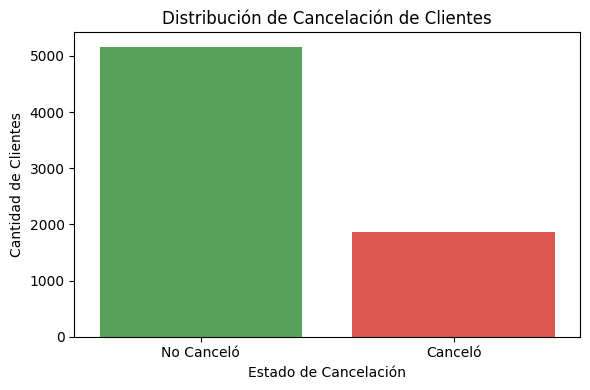

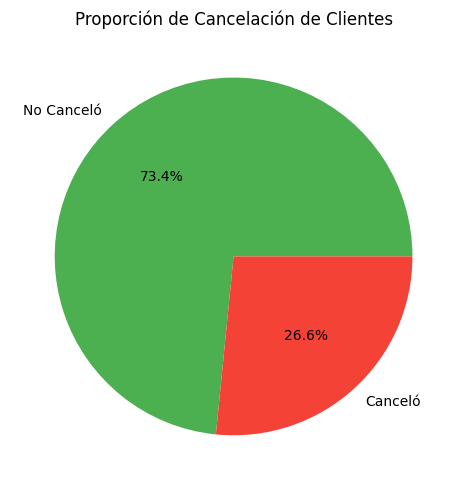

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Conteo absoluto
conteo_churn = datos['cancelacion'].value_counts().sort_index()
print("Conteo de cancelaciones:")
print(conteo_churn)

# 2. Porcentajes
porcentaje_churn = datos['cancelacion'].value_counts(normalize=True).sort_index() * 100
print("\nPorcentaje de cancelaciones:")
print(porcentaje_churn.round(2))

# 3. Gráfico de barras
plt.figure(figsize=(6, 4))
sns.barplot(x=conteo_churn.index, y=conteo_churn.values, palette=['#4CAF50', '#F44336'])
plt.xticks([0, 1], ['No Canceló', 'Canceló'])
plt.title("Distribución de Cancelación de Clientes")
plt.ylabel("Cantidad de Clientes")
plt.xlabel("Estado de Cancelación")
plt.tight_layout()
plt.show()

# 4. Gráfico circular (opcional)
plt.figure(figsize=(5, 5))
plt.pie(conteo_churn, labels=['No Canceló', 'Canceló'], autopct='%1.1f%%', colors=['#4CAF50', '#F44336'])
plt.title("Proporción de Cancelación de Clientes")
plt.tight_layout()
plt.show()


In [34]:
variables_categoricas = [
    'genero', 'tipo_contrato', 'metodo_pago',
    'servicio_tv', 'servicio_peliculas',
    'seguridad_en_linea', 'soporte_tecnico'
]



Análisis de la variable: genero
        Permanecen (%)  Cancelan (%)
genero                              
Female           73.04         26.96
Male             73.80         26.20


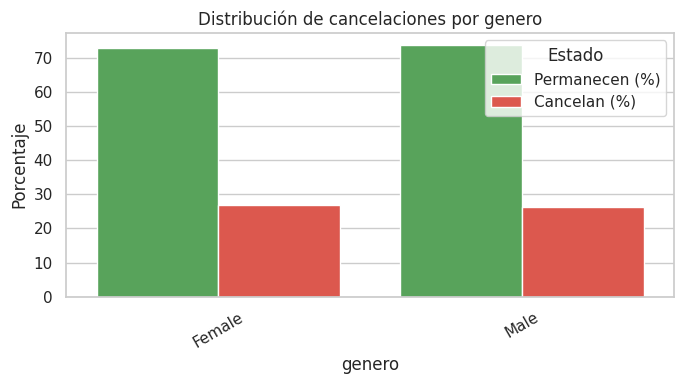


Análisis de la variable: tipo_contrato
                Permanecen (%)  Cancelan (%)
tipo_contrato                               
Month-to-month           57.29         42.71
One year                 88.72         11.28
Two year                 97.15          2.85


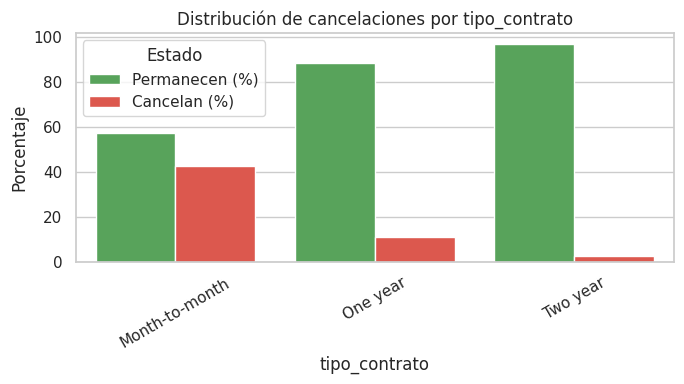


Análisis de la variable: metodo_pago
                           Permanecen (%)  Cancelan (%)
metodo_pago                                            
Bank transfer (automatic)           83.27         16.73
Credit card (automatic)             84.75         15.25
Electronic check                    54.71         45.29
Mailed check                        80.80         19.20


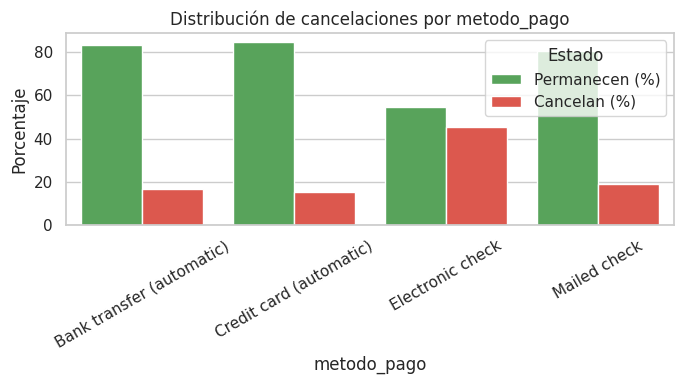


Análisis de la variable: servicio_tv
             Permanecen (%)  Cancelan (%)
servicio_tv                              
0                     66.46         33.54
1                     69.89         30.11


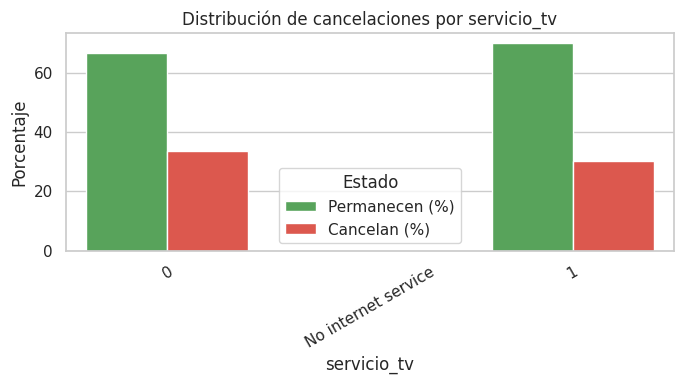


Análisis de la variable: servicio_peliculas
                    Permanecen (%)  Cancelan (%)
servicio_peliculas                              
0                            66.27         33.73
1                            70.05         29.95


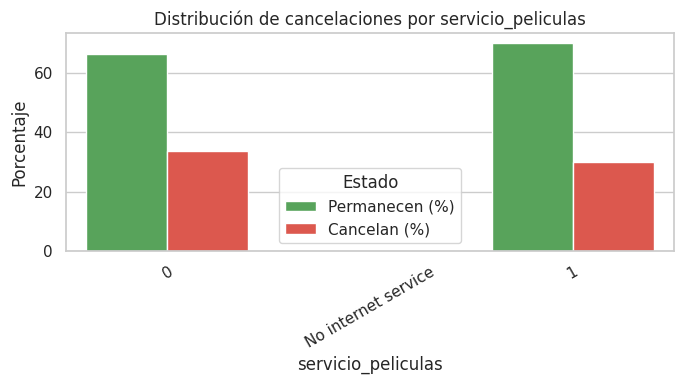


Análisis de la variable: seguridad_en_linea
                    Permanecen (%)  Cancelan (%)
seguridad_en_linea                              
0                            58.22         41.78
1                            85.36         14.64


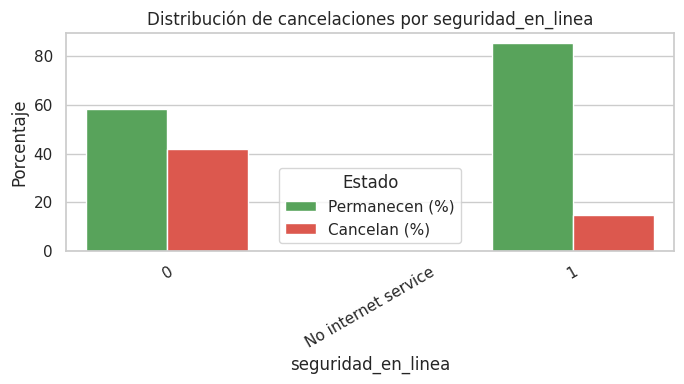


Análisis de la variable: soporte_tecnico
                 Permanecen (%)  Cancelan (%)
soporte_tecnico                              
0                         58.35         41.65
1                         84.80         15.20


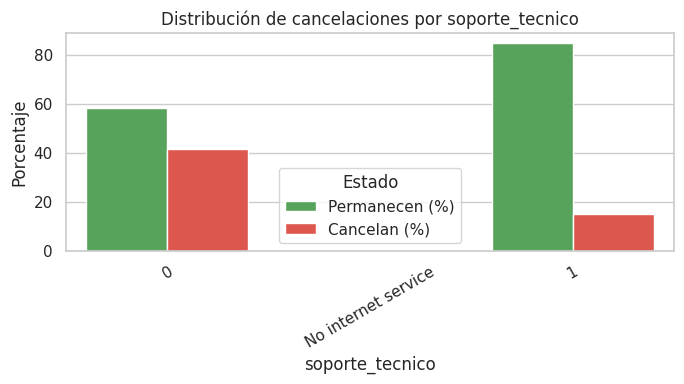

In [36]:
def analizar_cancelaciones(df, variable):
    df_filtrado = df[df[variable] != 'No internet service']  # Filtra "No internet service" si existe
    df_filtrado = df_filtrado.copy()

    # Agrupar y calcular proporciones
    tabla = pd.crosstab(df_filtrado[variable], df_filtrado['cancelacion'], normalize='index') * 100
    tabla.columns = ['Permanecen (%)', 'Cancelan (%)']

    print(f'\nAnálisis de la variable: {variable}')
    print(tabla.round(2))

    # Gráfico
    tabla_plot = tabla.reset_index().melt(id_vars=variable, value_name='Porcentaje', var_name='Estado')
    plt.figure(figsize=(7, 4))
    sns.barplot(data=tabla_plot, x=variable, y='Porcentaje', hue='Estado', palette=['#4CAF50', '#F44336'])
    plt.title(f'Distribución de cancelaciones por {variable}')
    plt.ylabel('Porcentaje')
    plt.xticks(rotation=30)
    plt.legend(title='Estado')
    plt.tight_layout()
    plt.show()

# Aplicar análisis a todas las variables
for var in variables_categoricas:
    analizar_cancelaciones(datos, var)

Análisis de la variable: cargo_total
              count         mean          std    min      25%      50%  \
cancelacion                                                              
False        5163.0  2555.344141  2329.456984  18.80  577.825  1683.60   
True         1869.0  1531.796094  1890.822994  18.85  134.500   703.55   

                  75%      max  
cancelacion                     
False        4264.125  8672.45  
True         2331.300  8684.80   



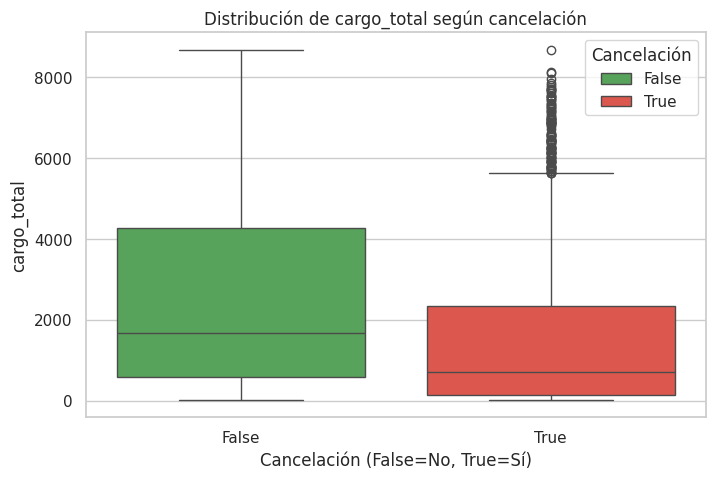

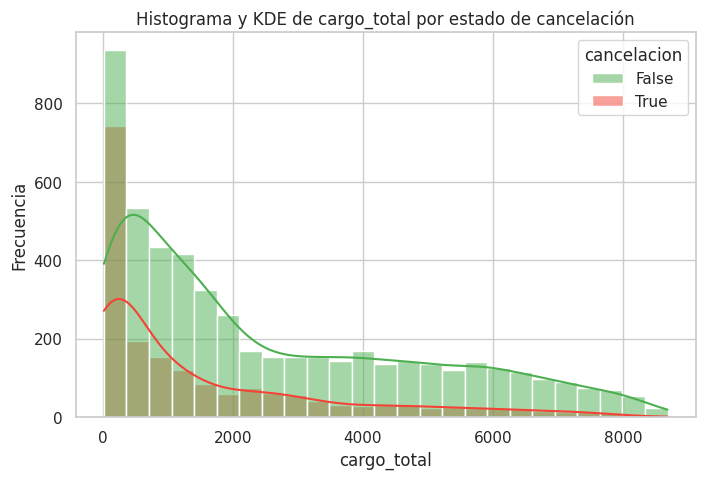

Análisis de la variable: meses_contrato
              count       mean        std  min   25%   50%   75%   max
cancelacion                                                           
False        5163.0  37.650010  24.076940  1.0  15.0  38.0  61.0  72.0
True         1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0 



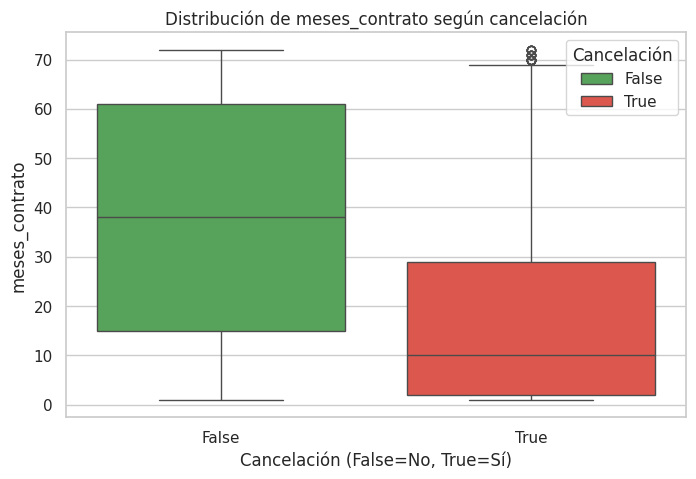

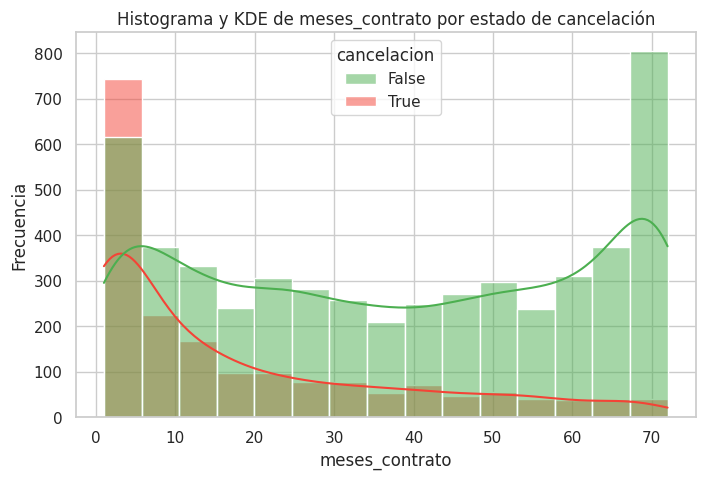

In [41]:

# Variables numéricas a analizar
variables_numericas = ['cargo_total', 'meses_contrato']

for var in variables_numericas:
    print(f"Análisis de la variable: {var}")
    resumen = datos.groupby('cancelacion')[var].describe()
    print(resumen, "\n")

    # Boxplot comparando la distribución según cancelación
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='cancelacion', y=var, data=datos, hue='cancelacion',
                palette=['#4CAF50', '#F44336'], dodge=False)
    plt.title(f'Distribución de {var} según cancelación')
    plt.xlabel('Cancelación (False=No, True=Sí)')
    plt.ylabel(var)
    plt.legend(title='Cancelación', loc='upper right')
    plt.show()

    # Histograma con KDE para cada grupo
    plt.figure(figsize=(8, 5))
    sns.histplot(data=datos, x=var, hue='cancelacion', kde=True,
                 palette=['#4CAF50', '#F44336'], alpha=0.5)
    plt.title(f'Histograma y KDE de {var} por estado de cancelación')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.show()


## **INFORME FINAL**

# **Introducción**

Telecom X está enfrentando un problema importante: muchos clientes están cancelando sus servicios y dejando la empresa. Esta situación afecta sus ingresos y hace necesario entender por qué ocurre.

El objetivo de este análisis es estudiar los datos de los clientes para identificar las razones que llevan a la cancelación. Con esta información, se podrá ayudar a la empresa a predecir qué clientes tienen más riesgo de irse y así diseñar estrategias para evitar que eso suceda.

# **Limpieza y Tratamiento de Datos**

Para preparar el conjunto de datos antes de analizarlo, se realizó un proceso de limpieza y organización para asegurar que la información fuera clara, completa y confiable.

Primero, se revisaron todas las columnas para detectar si había datos faltantes. En especial, se buscó si algunas celdas estaban vacías o contenían solo espacios en blanco, ya que esto puede causar errores en el análisis. Estas celdas se reemplazaron por un valor nulo (NaN), lo que permite tratarlas de forma uniforme.

Después, se eliminaron las filas que tenían datos faltantes en la columna cargo_total, ya que esta información es muy importante para el análisis y debe estar completa. Luego, esta columna se convirtió a un tipo de dato numérico (decimal), lo que facilita hacer cálculos y análisis estadísticos.

También se transformaron algunas columnas que tenían respuestas como “Yes” y “No” a valores booleanos, es decir, True o False. Esto hace que los datos sean más fáciles de interpretar y trabajar. Además, otras columnas que contienen categorías, como tipo_internet, tipo_contrato y servicio_tv, se cambiaron a un formato especial para datos categóricos, lo que ayuda a ahorrar memoria y mejora el rendimiento del análisis.

Por último, se eliminaron las filas duplicadas para evitar que los resultados se vean afectados por datos repetidos. Se hizo una revisión final del conjunto de datos para asegurarse de que todo estuviera en orden y listo para comenzar el análisis.

# **Análisis Exploratorio de Datos**

Se realizó un análisis de las variables categóricas y numéricas para identificar patrones relacionados con la cancelación del servicio por parte de los clientes.
#**Variables categóricas**
***Género:*** La proporción de clientes que cancelan es muy similar entre mujeres (26.96%) y hombres (26.20%), lo que indica que el género no influye significativamente en la evasión.

***Tipo de contrato:*** Existe una diferencia importante en la tasa de cancelación según la duración del contrato. Los clientes con contratos mes a mes presentan una tasa de cancelación alta (42.71%), mientras que aquellos con contratos a un año o dos años cancelan en menor proporción (11.28% y 2.85%, respectivamente). Esto muestra que los contratos a largo plazo ayudan a retener mejor a los clientes.

***Método de pago:*** Los clientes que usan el cheque electrónico como método de pago tienen la tasa de cancelación más alta (45.29%), mientras que los que utilizan transferencias bancarias o tarjetas de crédito automáticas tienen tasas mucho menores (alrededor del 15-17%). Esto puede reflejar diferencias en el nivel de compromiso o confiabilidad según el método de pago.

***Servicios adicionales:***

La presencia de servicio de televisión o de películas está asociada con una ligera mejora en la retención, con tasas de cancelación cercanas al 30% frente a aproximadamente 33% en quienes no los tienen.

Los servicios de seguridad en línea y soporte técnico muestran diferencias más notables. Los clientes que cuentan con estos servicios presentan tasas de cancelación significativamente más bajas (14.64% y 15.20%, respectivamente), mientras que quienes no los tienen tienen tasas superiores al 41%. Esto sugiere que ofrecer estos servicios adicionales puede reducir la evasión.

# **Variables numéricas**
***Cargo total:*** El promedio del total gastado por los clientes que permanecen es considerablemente mayor (2555.34) que el de quienes cancelan (1531.80). Esto indica que quienes invierten más en el servicio tienden a mantenerse más tiempo.

***Meses de contrato:*** Los clientes que continúan con el servicio tienen una antigüedad promedio de casi 38 meses, mientras que quienes cancelan llevan en promedio cerca de 18 meses. Esto refuerza la idea de que una relación más larga con el cliente está vinculada a una menor probabilidad de evasión.

# **Conclusión**

El análisis de los datos muestra varios puntos importantes sobre los clientes que cancelan el servicio. Para empezar, el género no parece tener un impacto real en la cancelación, ya que tanto hombres como mujeres lo hacen en proporciones muy parecidas.

Por otro lado, el tipo de contrato sí marca una gran diferencia. Los clientes con contratos mes a mes cancelan mucho más que aquellos con contratos de uno o dos años. Esto indica que los contratos más largos ayudan a que los clientes se queden por más tiempo.

También se observan diferencias claras según el método de pago. Las personas que pagan con cheque electrónico cancelan con más frecuencia, mientras que quienes usan pagos automáticos, como tarjeta de crédito o transferencia bancaria, tienden a seguir con el servicio. Esto podría estar relacionado con la comodidad o el compromiso que implica cada forma de pago.

En cuanto a los servicios adicionales, tener televisión o películas parece ayudar un poco a que los clientes se queden, pero lo que realmente marca la diferencia es contar con seguridad en línea o soporte técnico. Quienes tienen estos servicios cancelan mucho menos que quienes no los tienen.

Finalmente, al analizar los números, se ve que los clientes que permanecen han gastado más en total y llevan más tiempo con el servicio. Esto sugiere que, mientras más tiempo y dinero invierte un cliente, más probable es que continúe.

# **Recomendaciones**

1. **Ofrecer beneficios por elegir contratos más largos.**
Las personas que tienen contratos de uno o dos años cancelan mucho menos que las que pagan mes a mes. Por eso, sería buena idea dar descuentos o regalos a quienes acepten quedarse más tiempo desde el inicio.

2. **Motivar a usar pagos automáticos.**
Quienes pagan con tarjeta o por transferencia automática suelen seguir con el servicio. Se puede animar a más clientes a usar estos métodos ofreciendo algún beneficio, como un pequeño descuento o un mes gratis.

3. **Incluir servicios que realmente ayudan.**
Servicios como seguridad en línea o ayuda técnica hacen que los clientes se queden más tiempo. Sería útil incluirlos en los planes o darlos como parte de una promoción para que más personas los usen.

4. **Prestar atención a los nuevos clientes o a los que gastan poco.**
Las personas que llevan poco tiempo o que no gastan mucho son las que más cancelan. Se les puede enviar mensajes de bienvenida, hacerles llamadas de seguimiento o darles ofertas especiales para que se sientan valoradas.

5. **Detectar a tiempo quién podría cancelar.**
Con la información que ya se tiene (como el tipo de contrato, cómo pagan o qué servicios usan), se puede hacer una lista de clientes que podrían estar pensando en irse. Así, se les puede contactar antes y ofrecerles algo que los motive a quedarse.

6. **Revisar los datos con frecuencia.**
Es importante seguir revisando cada cierto tiempo quiénes cancelan y por qué. Esto ayuda a ajustar las estrategias y a tomar decisiones más acertadas.


